In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [358]:
df=pd.read_csv('csv/train.csv')

In [359]:
def to_date2(row):
    x=datetime.strptime(row['date_priced'], '%m/%d/%Y %I:%M %p')
    return x
def to_date1(row):
    x=datetime.strptime(row['buid_date'], '%m/%d/%Y %I:%M %p')
    return x
def fun_b_year(row):
    x=row['build_date']
    return x.year

def fun_p_year(row):
    x=row['date_priced']
    return x.year

df['buid_date']=df.apply(lambda i:to_date1(i),axis=1)
df['date_priced']=df.apply(lambda i:to_date2(i),axis=1)

#df['build_year']=df.apply(lambda i:fun_b_year(i),axis=1)
#df['priced_year']=df.apply(lambda i:fun_p_year(i),axis=1)

In [360]:
x=df['buid_date']

In [298]:
#df=df.convert_objects(convert_numeric=True)

In [362]:
for i in range (0, df.index.size):
    df.loc[i,'house_age']=(df.loc[i,'date_priced']-df.loc[i,'buid_date']).days
    df.loc[i,'build_year']=(df.loc[i,'buid_date']).year
    df.loc[i,'priced_year']=(df.loc[i,'date_priced']).year

In [363]:
df.head()

,house_id,buid_date,date_priced,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,...,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price,house_age,build_year,priced_year
0,6e32cec0,1602-04-21 00:41:00,1609-07-09 01:11:00,0.0,138.600639,0.256239,69.486467,14.394903,63.109038,0.0,...,160,small,King's Landing,yes,10.505662,data/Bob,1470912.0,2636.0,1602.0,1609.0
1,6e32ceda,1603-10-23 23:14:00,1611-10-21 07:40:00,0.0,10.998322,122.930753,63.794375,53.019891,17.045949,0.0,...,37,huge,The Mountains,yes,132.934312,data/Bob,1052137.0,2919.0,1603.0,1611.0
2,6e32cf09,1603-03-18 03:53:00,1610-05-17 21:36:00,0.0,52.819705,80.970959,96.656914,70.965631,6.548119,0.0,...,79,small,Cursed Land,yes,91.425357,data/Bob,1017577.0,2617.0,1603.0,1610.0
3,6e32cfa9,1606-08-18 00:23:00,1608-01-20 10:45:00,0.0,82.283966,4.331436,29.043012,119.126593,24.298255,0.0,...,156,small,Cursed Land,no,14.695102,data/Bob,1409057.0,520.0,1606.0,1608.0
4,6e32cfb7,1603-09-11 11:53:00,1611-05-20 16:49:00,0.0,34.524141,NaN,6.740951,222.341302,1.821655,0.0,...,74,small,The Mountains,yes,NaN,data/Bob,1317434.0,2808.0,1603.0,1611.0


In [302]:
df.describe()

,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,dst_knight,price,house_age
count,14515.000000,14859.000000,15669.000000,14146.000000,15956.000000,16500.000000,14871.000000,14862.000000,15851.000000,15536.000000,16500.000000,15502.000000,16500.000000,15669.000000,1.650000e+04,16500.000000
mean,0.096659,46.305520,42.674021,48.715817,101.110421,30.288848,0.195817,3.001615,3.001514,3.007209,0.085030,0.149336,115.142545,53.169633,1.306901e+06,2374.200242
std,0.295503,35.131047,34.365941,34.960087,66.389095,22.036027,0.396842,0.816358,0.813605,0.820371,0.278935,0.356430,34.806516,34.367460,1.628483e+05,972.831482
min,0.000000,0.000288,0.000714,0.011985,0.012093,0.007765,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,10.035601,6.250830e+05,30.000000
25%,0.000000,17.746333,14.876478,20.455767,47.177363,12.515697,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,90.000000,25.383901,1.208923e+06,1671.000000
50%,0.000000,37.969819,33.599468,41.463328,91.626909,25.352928,0.000000,3.000000,3.000000,3.000000,0.000000,0.000000,124.000000,44.084289,1.330423e+06,2371.000000
75%,0.000000,68.468817,63.844377,71.184760,146.311675,44.503404,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,144.000000,74.390126,1.425944e+06,3074.250000
max,1.000000,157.658673,156.893349,157.857240,297.334188,99.260600,1.000000,4.000000,4.000000,4.000000,1.000000,1.000000,160.000000,167.131365,1.747559e+06,4697.000000


In [306]:
#df['dst_dock']=df['dst_dock'].fillna(df['dst_dock'].mean())
#df['dst_dock']=df['dst_dock'].fillna(df['dst_dock'].mean())
#df['dst_dock']=df['dst_dock'].fillna(df['dst_dock'].mean())


In [373]:
x=df['priced_year'].unique()

In [374]:
len(x)

6

In [287]:
df['garden']=df['garden'].fillna(0)

In [274]:
df[['garden','king_visit']].head(n=20)

,garden,king_visit
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,NaN,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


,house_id,buid_date,date_priced,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,...,king_visit,curse,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price,house_age


In [160]:
df.describe()

,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,dst_knight,price
count,14515.000000,14859.000000,15669.000000,14146.000000,15956.000000,16500.000000,14871.000000,14862.000000,15851.000000,15536.000000,16500.000000,15502.000000,16500.000000,15669.000000,1.650000e+04
mean,0.096659,46.305520,42.674021,48.715817,101.110421,30.288848,0.195817,3.001615,3.001514,3.007209,0.085030,0.149336,115.142545,53.169633,1.306901e+06
std,0.295503,35.131047,34.365941,34.960087,66.389095,22.036027,0.396842,0.816358,0.813605,0.820371,0.278935,0.356430,34.806516,34.367460,1.628483e+05
min,0.000000,0.000288,0.000714,0.011985,0.012093,0.007765,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,3.000000,10.035601,6.250830e+05
25%,0.000000,17.746333,14.876478,20.455767,47.177363,12.515697,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,90.000000,25.383901,1.208923e+06
50%,0.000000,37.969819,33.599468,41.463328,91.626909,25.352928,0.000000,3.000000,3.000000,3.000000,0.000000,0.000000,124.000000,44.084289,1.330423e+06
75%,0.000000,68.468817,63.844377,71.184760,146.311675,44.503404,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,144.000000,74.390126,1.425944e+06
max,1.000000,157.658673,156.893349,157.857240,297.334188,99.260600,1.000000,4.000000,4.000000,4.000000,1.000000,1.000000,160.000000,167.131365,1.747559e+06


In [161]:
c=df.corr()

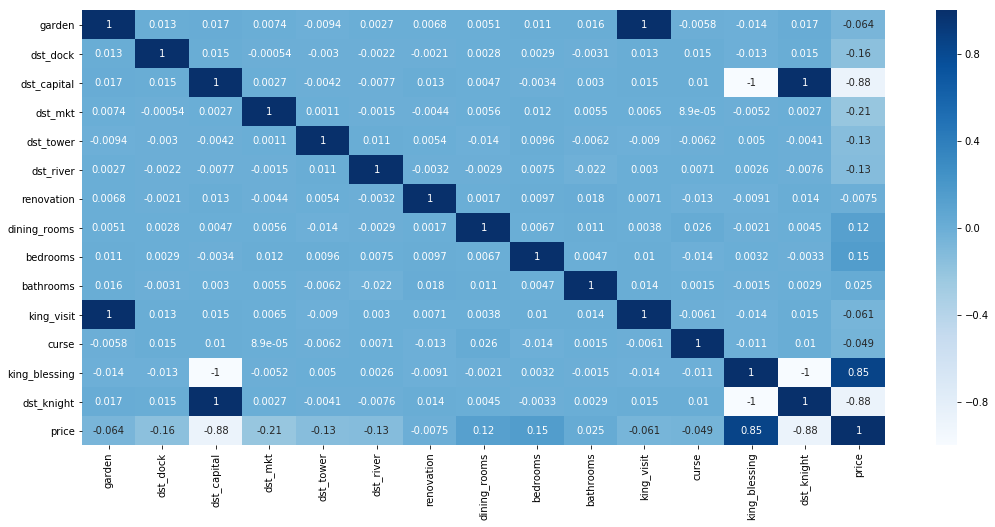

In [162]:
plt.figure(figsize=[18,8])
sns.heatmap(c,annot=True,cmap="Blues")

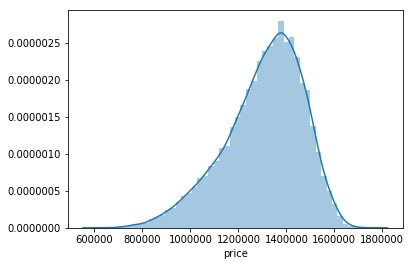

In [163]:
sns.distplot(df['price'],)

In [164]:
df.head()

,house_id,buid_date,date_priced,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,...,bathrooms,king_visit,curse,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price
0,6e32cec0,4/21/1602 12:41 AM,7/9/1609 1:11 AM,0.0,138.600639,0.256239,69.486467,14.394903,63.109038,0.0,...,NaN,0,0.0,160,small,King's Landing,yes,10.505662,data/Bob,1470912.0
1,6e32ceda,10/23/1603 11:14 PM,10/21/1611 7:40 AM,0.0,10.998322,122.930753,63.794375,53.019891,17.045949,0.0,...,3.0,0,0.0,37,huge,The Mountains,yes,132.934312,data/Bob,1052137.0
2,6e32cf09,3/18/1603 3:53 AM,5/17/1610 9:36 PM,0.0,52.819705,80.970959,96.656914,70.965631,6.548119,0.0,...,3.0,0,0.0,79,small,Cursed Land,yes,91.425357,data/Bob,1017577.0
3,6e32cfa9,8/18/1606 12:23 AM,1/20/1608 10:45 AM,0.0,82.283966,4.331436,29.043012,119.126593,24.298255,0.0,...,3.0,0,1.0,156,small,Cursed Land,no,14.695102,data/Bob,1409057.0
4,6e32cfb7,9/11/1603 11:53 AM,5/20/1611 4:49 PM,0.0,34.524141,NaN,6.740951,222.341302,1.821655,0.0,...,4.0,0,0.0,74,small,The Mountains,yes,NaN,data/Bob,1317434.0


In [11]:
df.describe()

,garden,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,bedrooms,bathrooms,king_visit,curse,king_blessing,dst_knight,price
count,14515.000000,14859.000000,15669.000000,14146.000000,15956.000000,16500.000000,14871.000000,14862.000000,15851.000000,15536.000000,15097.0,15502.000000,16500.000000,15669.000000,1.650000e+04
mean,0.096659,46.305520,42.674021,48.715817,101.110421,30.288848,0.195817,3.001615,3.001514,3.007209,0.0,0.149336,115.142545,53.169633,1.306901e+06
std,0.295503,35.131047,34.365941,34.960087,66.389095,22.036027,0.396842,0.816358,0.813605,0.820371,0.0,0.356430,34.806516,34.367460,1.628483e+05
min,0.000000,0.000288,0.000714,0.011985,0.012093,0.007765,0.000000,2.000000,2.000000,2.000000,0.0,0.000000,3.000000,10.035601,6.250830e+05
25%,0.000000,17.746333,14.876478,20.455767,47.177363,12.515697,0.000000,2.000000,2.000000,2.000000,0.0,0.000000,90.000000,25.383901,1.208923e+06
50%,0.000000,37.969819,33.599468,41.463328,91.626909,25.352928,0.000000,3.000000,3.000000,3.000000,0.0,0.000000,124.000000,44.084289,1.330423e+06
75%,0.000000,68.468817,63.844377,71.184760,146.311675,44.503404,0.000000,4.000000,4.000000,4.000000,0.0,0.000000,144.000000,74.390126,1.425944e+06
max,1.000000,157.658673,156.893349,157.857240,297.334188,99.260600,1.000000,4.000000,4.000000,4.000000,0.0,1.000000,160.000000,167.131365,1.747559e+06


In [53]:
df.groupby('garden',axis=0).count()

,house_id,buid_date,date_priced,dst_dock,dst_capital,dst_mkt,dst_tower,dst_river,renovation,dining_rooms,...,bathrooms,king_visit,curse,king_blessing,farm_land,locations,holy_tree,dst_knight,builder,price
garden,,,,,,,,,,,,,,,,,,,,,
0.0,13112,13112,13112,11825,12436,11259,12680,13112,11804,11826,...,12341,13112,12319,13112,13112,11795,10526,12436,13112,13112
1.0,1403,1403,1403,1240,1335,1197,1359,1403,1258,1255,...,1320,0,1322,1403,1403,1256,1126,1335,1403,1403


In [123]:
pd.value_counts(df['garden'])

0.0    13112
1.0     1403
Name: garden, dtype: int64

In [124]:
pd.value_counts(df['king_visit'])

0.0    15097
Name: king_visit, dtype: int64

In [125]:
import datetime

In [126]:
datetime.datetime.today()

datetime.datetime(2018, 3, 30, 0, 40, 9, 88614)

In [127]:
datetime.date(x)

TypeError: an integer is required (got type str)

In [130]:
z[0]=z[0].strip()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
x=z[0].split(' ')
df.loc()

In [135]:
x[0].split('/')

['4', '21', '1602']

In [ ]:
def fun_day(row):
    x=row['build_date'].split()
    x[0].split




df['b_day']=df.apply(lambda i :fun_day(i),axis=1)
df['b_mon']=df.apply(lambda i :fun_mon(i),axis=1)
df['b_year']=df.apply(lambda i :fun_year(i),axis=1)
df['b_hour']=df.apply(lambda i :fun_hour(i),axis=1)

df['p_day']=df.apply(lambda i :fun_day_p(i),axis=1)
df['p_mon']=df.apply(lambda i :fun_mon_p(i),axis=1)
df['p_year']=df.apply(lambda i :fun_year_p(i),axis=1)
df['p_hour']=df.apply(lambda i :fun_hour_p(i),axis=1)

In [349]:
x=df['buid_date'][3]

In [350]:
x.year

1606

In [351]:
x.month

8

In [207]:
#y=datetime.strptime(z1, '%m/%d/%Y %I:%M %p')

In [202]:
x=x.strftime('%m/%d/%Y %I:%M %p')

In [203]:
y=y.strftime('%m/%d/%Y %I:%M %p')

In [212]:
z.days


2636

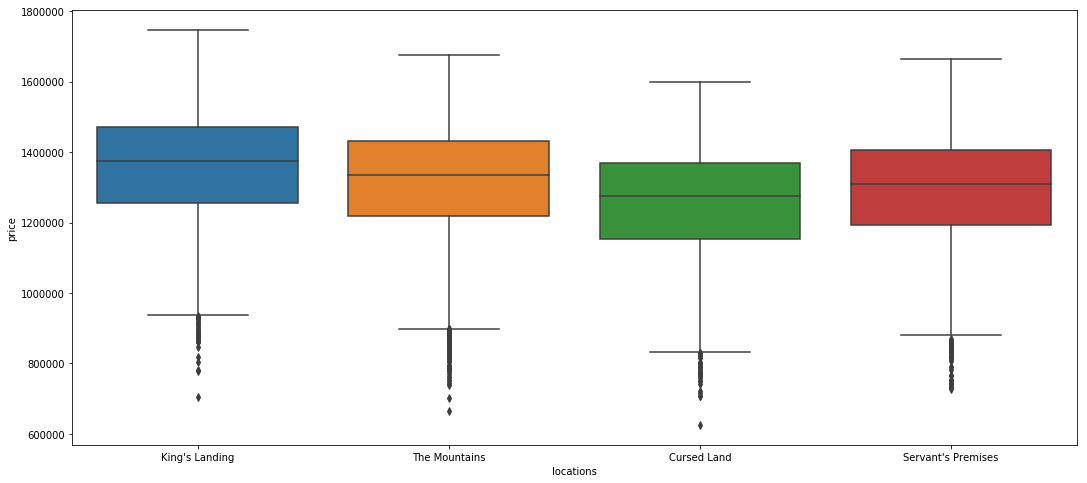

In [312]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='locations',data=df)

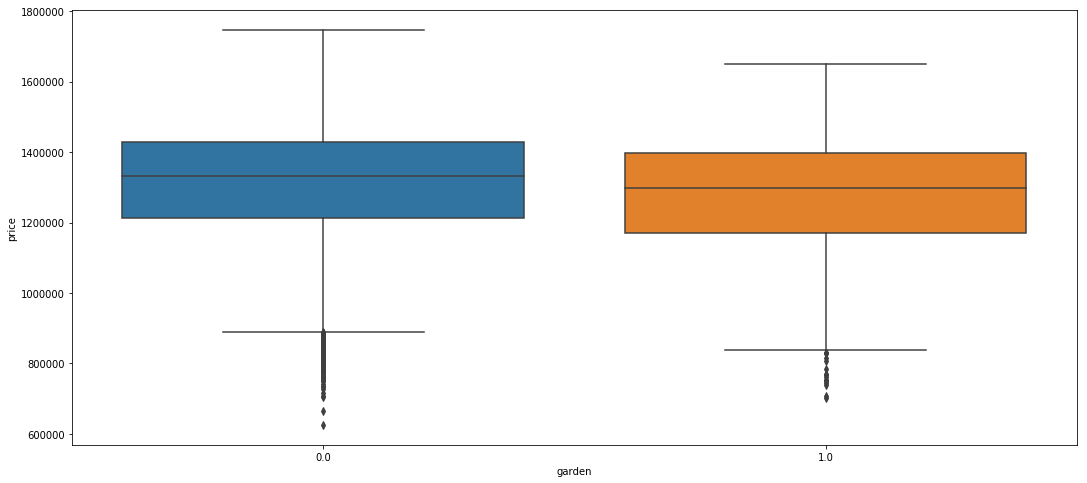

In [313]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='garden',data=df)

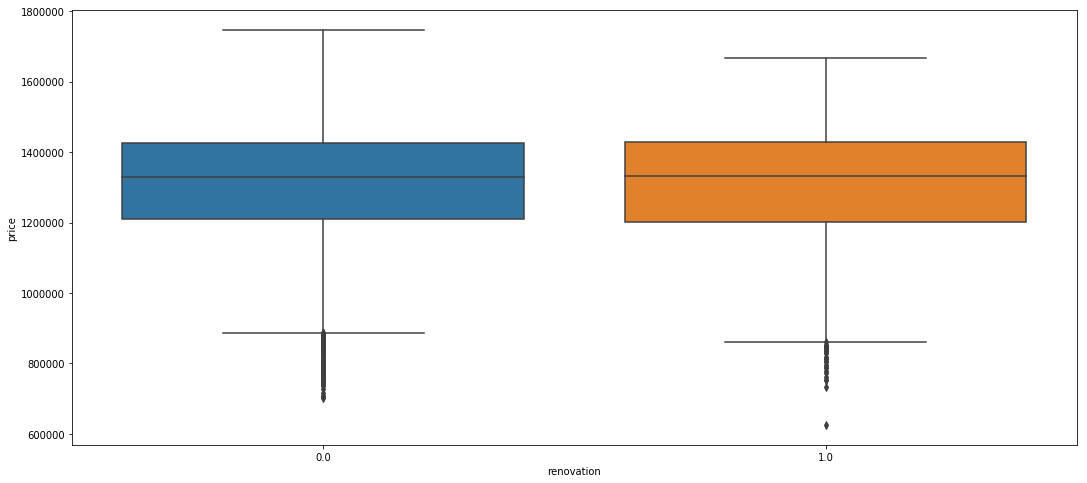

In [314]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='renovation',data=df)

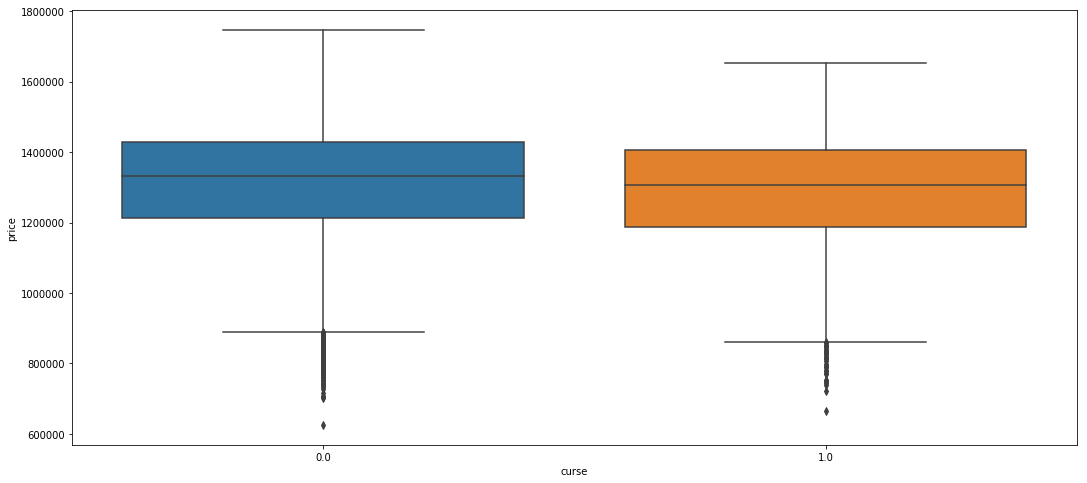

In [315]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='curse',data=df)

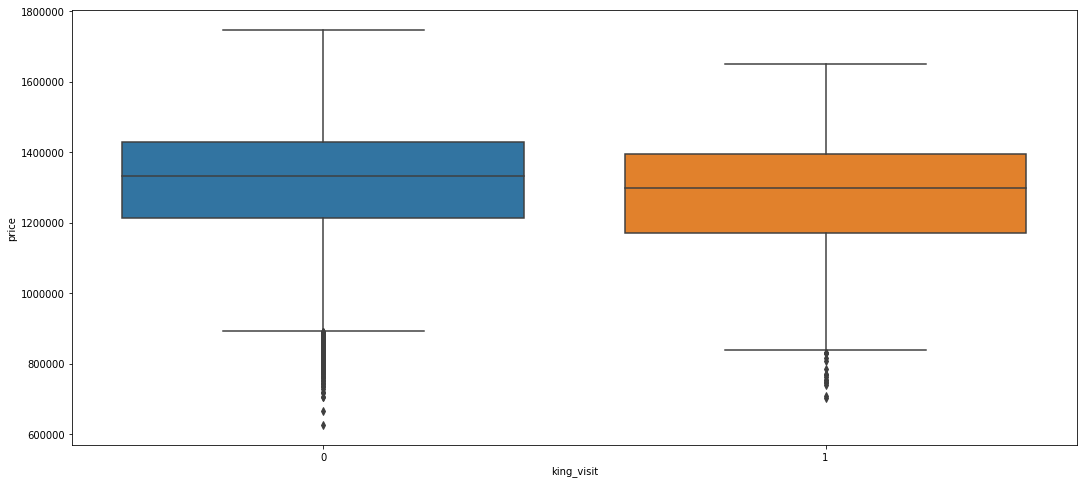

In [316]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='king_visit',data=df)

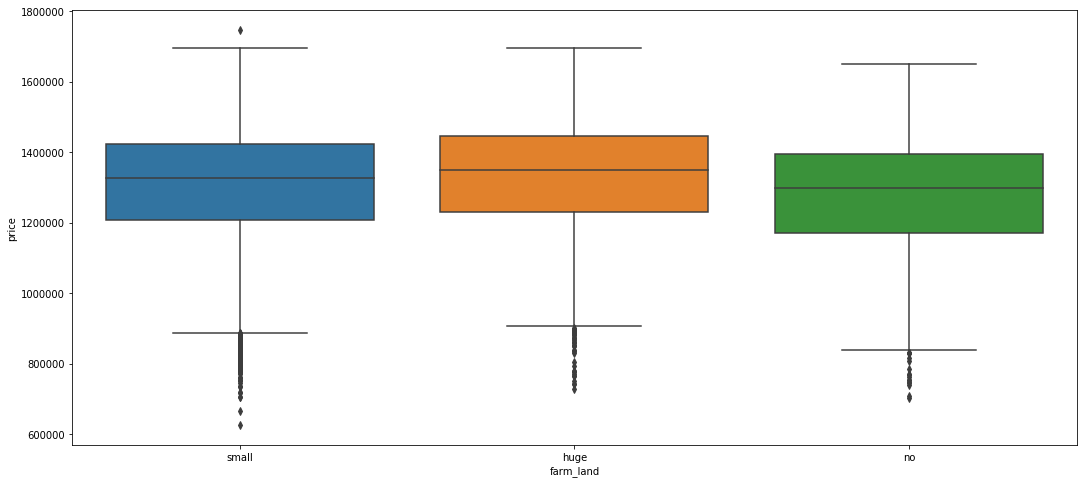

In [317]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='farm_land',data=df)

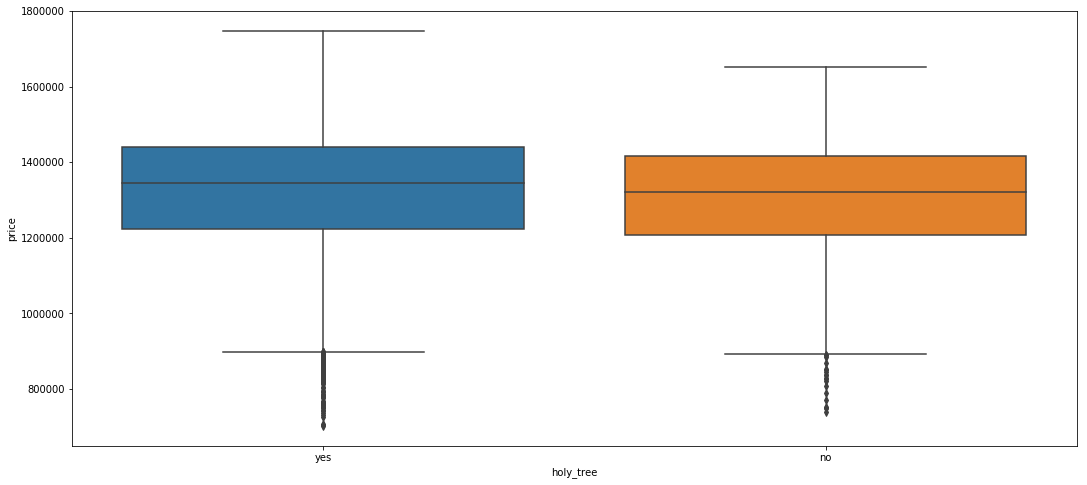

In [318]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='holy_tree',data=df)

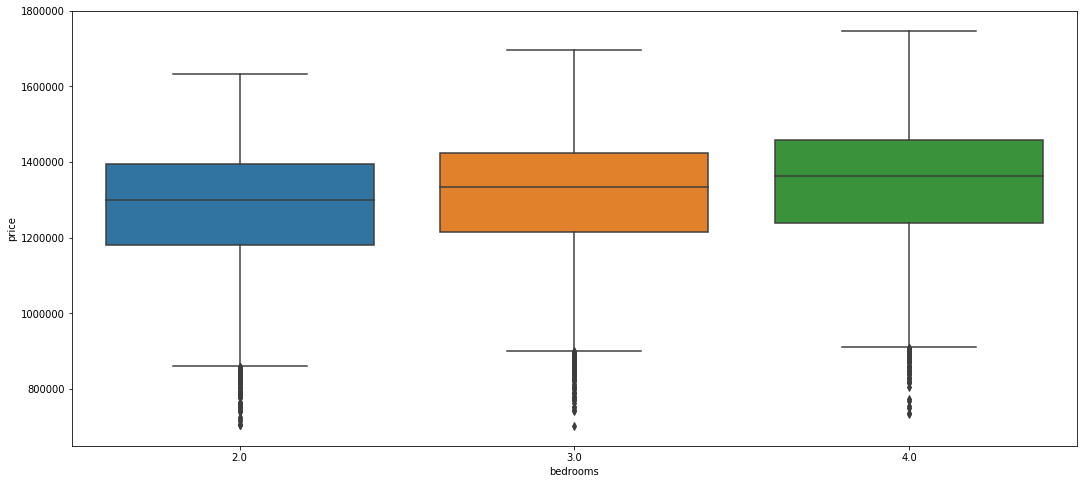

In [319]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='bedrooms',data=df)

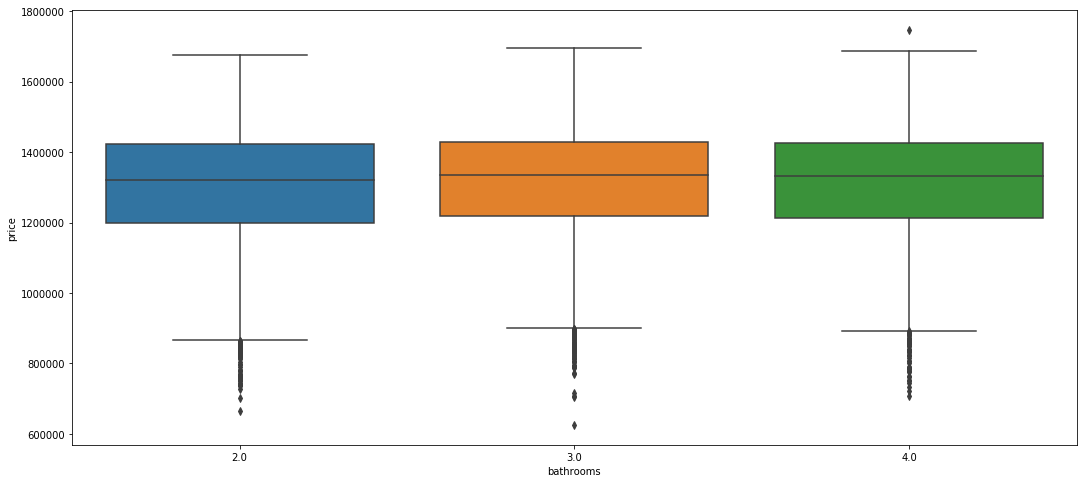

In [320]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='bathrooms',data=df)

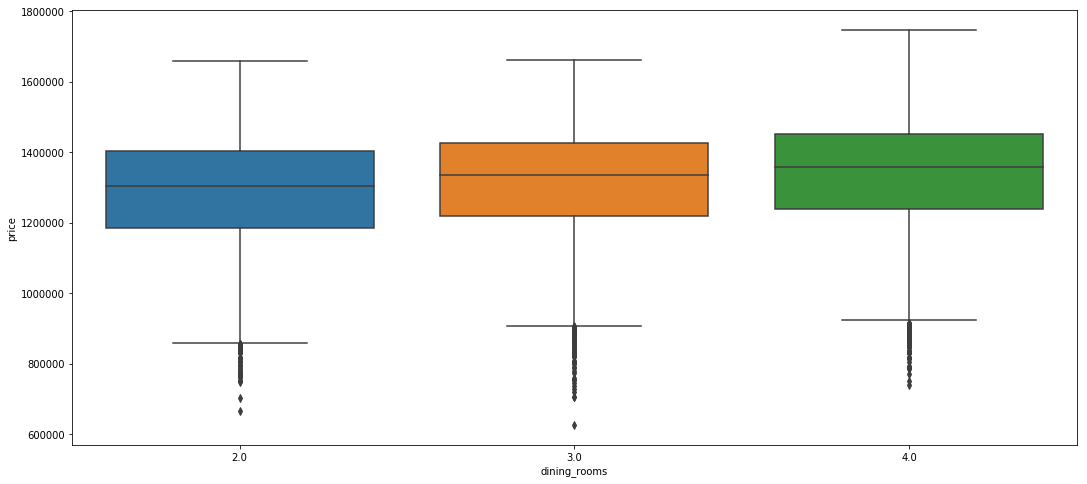

In [325]:
plt.figure(figsize=[18,8])
sns.boxplot(y='price',x='dining_rooms',data=df)

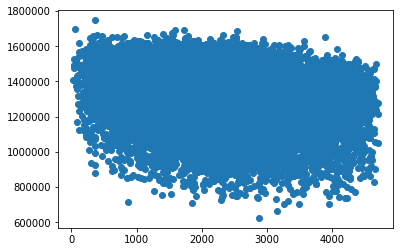

In [327]:
plt.scatter(y='price',x='house_age',data=df)

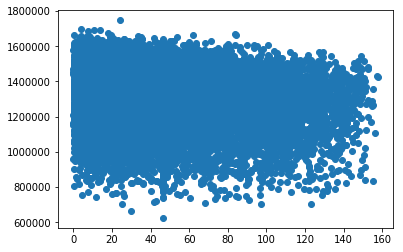

In [328]:
plt.scatter(y='price',x='dst_dock',data=df)

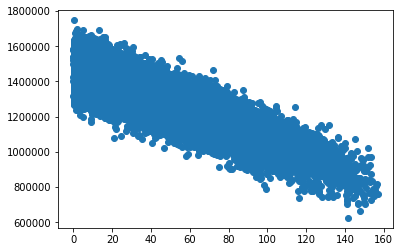

In [329]:
plt.scatter(y='price',x='dst_capital',data=df)

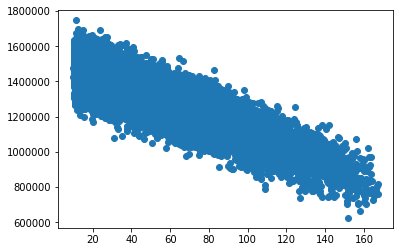

In [330]:
plt.scatter(y='price',x='dst_knight',data=df)

(array([  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   1.30000000e+01,
          1.70000000e+01,   1.70000000e+01,   2.50000000e+01,
          4.20000000e+01,   5.40000000e+01,   6.20000000e+01,
          9.00000000e+01,   1.01000000e+02,   1.31000000e+02,
          1.59000000e+02,   1.74000000e+02,   2.05000000e+02,
          2.48000000e+02,   2.59000000e+02,   3.10000000e+02,
          3.34000000e+02,   3.99000000e+02,   4.08000000e+02,
          5.06000000e+02,   5.56000000e+02,   6.14000000e+02,
          6.96000000e+02,   7.38000000e+02,   8.36000000e+02,
          8.88000000e+02,   9.12000000e+02,   9.51000000e+02,
          1.03800000e+03,   9.32000000e+02,   9.56000000e+02,
          8.54000000e+02,   7.28000000e+02,   6.92000000e+02,
          5.08000000e+02,   3.79000000e+02,   2.60000000e+02,
          1.85000000e+02,   1.19000000e+02,   5.70000000e+01,
          2.10000000e+01,   1.00000000e+01,   4.00000000e+00,
        

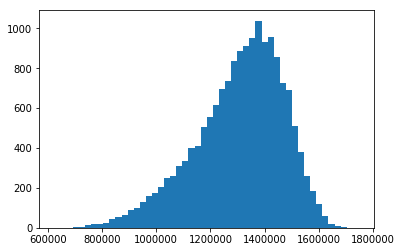

In [335]:
plt.hist(df['price'],bins=50)

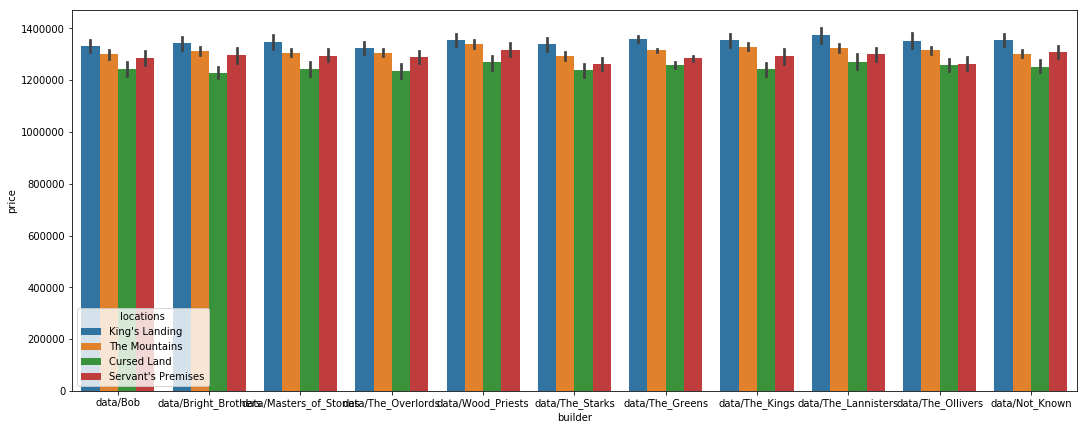

In [345]:
plt.figure(figsize=(18,7))
sns.barplot(x='builder',y='price',data=df,hue='locations')

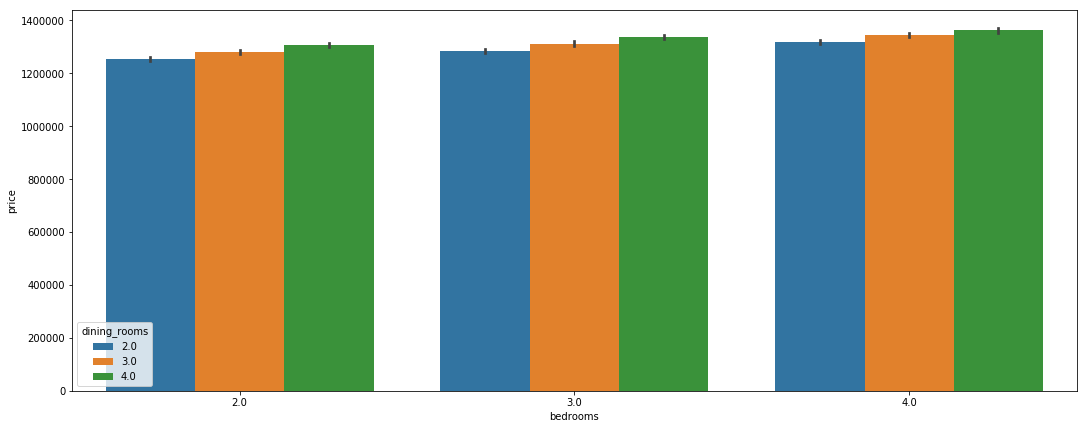

In [347]:
plt.figure(figsize=(18,7))
sns.barplot(x='bedrooms',y='price',data=df,hue='dining_rooms')

In [323]:
df.columns

Index(['house_id', 'buid_date', 'date_priced', 'garden', 'dst_dock',
       'dst_capital', 'dst_mkt', 'dst_tower', 'dst_river', 'renovation',
       'dining_rooms', 'bedrooms', 'bathrooms', 'king_visit', 'curse',
       'king_blessing', 'farm_land', 'locations', 'holy_tree', 'dst_knight',
       'builder', 'price', 'house_age'],
      dtype='object')

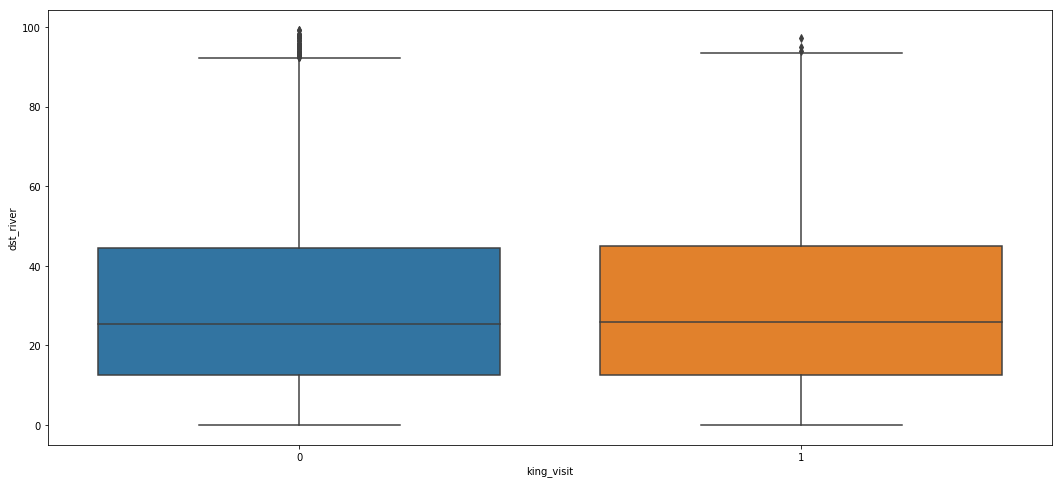

In [376]:
plt.figure(figsize=[18,8])
sns.boxplot(y='dst_river',x='king_visit',data=df)

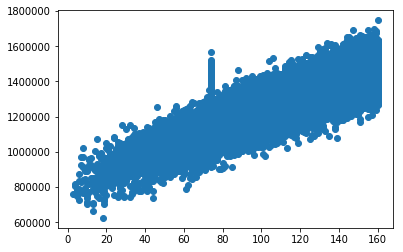

In [379]:
plt.scatter(x='king_blessing',y='price',data=df)

In [181]:
from datetime import datetime

war_start = '2011-01-03'
datetime.strptime(dt_str, '%m/%d/%Y %I:%M:%S %p')

datetime.datetime(2011, 1, 3, 0, 0)

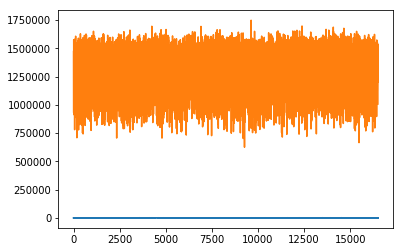

In [191]:
plt.plot(df[['dst_capital','price']])